# Linear Programming

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import linprog

**Note:**

- Independent variables(x, y) are called **decision variables**

- The function of the decision variables to be **maximized** or **minimized** in case **z**. It is called theobjective function, cost function, or the goal
    
- The inequalities needed to be satisfied are called **inequality constraints**. You may also have equality constraints called **equality constraints**

### Problem statement: Employment at hourly rates subject to constraints

At a university, a professor wishes to employ two people, Nick and Julia, to grade papers for his classes. 

- Nick is a graduate student and can grade 20 papers per hour; Nick earns $15 per hour for grading papers. 

- Julia is an post-doctoral associate and can grade 30 papers per hour; Julia earns $23 per hour for grading papers. 


The professor has at least 120 papers to be graded each week. 

In addition 3 times Nick's hours and 5 times Julia's hours cannot exceed 75 (arbitrary constraint on how much work he can allocate on an hourly basis to grad and post-grad students).

Hw many hours per week should he employ each person to minimize the cost?

**Objective function (minimize):**

Z = 15𝑥 + 23𝑦

**Subject to constraints:**

20𝑥 + 30𝑦 >= 120

3𝑥 + 5𝑦 <= 75

**Non-negativity constraints**

𝑥 ≥ 0
𝑦 ≥ 0

In [ ]:
# Z = 15𝑥 + 23𝑦

x_i = np.linspace(0, 100, 10000)

x_i[:10]

array([0.      , 0.010001, 0.020002, 0.030003, 0.040004, 0.050005,
       0.060006, 0.070007, 0.080008, 0.090009])

In [ ]:
# 20𝑥 + 30𝑦 >= 120

y_1 = (120 - 20 * x_i) / 30

y_1[:10]

array([4.        , 3.99333267, 3.98666533, 3.979998  , 3.97333067,
       3.96666333, 3.959996  , 3.95332867, 3.94666133, 3.939994  ])

In [ ]:
# 𝑥 + 𝑦 <= 75

y_2 = (75 - 3 * x_i) / 5

y_2[:10]

array([15.       , 14.9939994, 14.9879988, 14.9819982, 14.9759976,
       14.969997 , 14.9639964, 14.9579958, 14.9519952, 14.9459946])

### Since the feasible area is bounded it is a bounded problem and will have an optimal solution

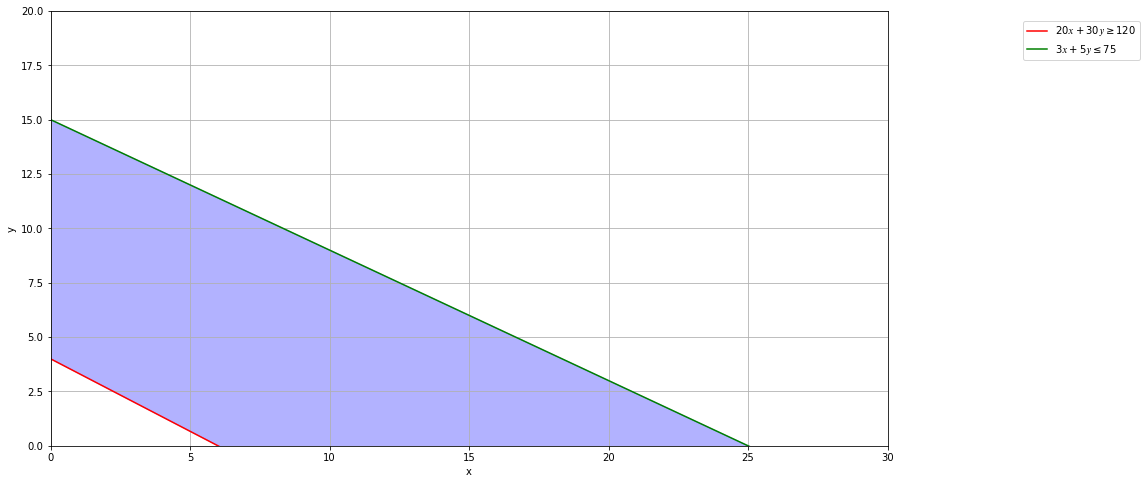

In [ ]:
plt.figure(figsize=(15, 8))

plt.plot(x_i, y_1, color = 'red', label=r'$20𝑥 + 30𝑦\geq120$', alpha = 1)
plt.plot(x_i, y_2, color = 'green', label=r'$3𝑥 + 5𝑦\leq75$', alpha = 1)

plt.grid(True)
plt.xlim((0, 30))
plt.ylim((0, 20))
plt.xlabel('x')
plt.ylabel('y')

plt.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=1)
plt.fill_between(x_i, y_1, y_2, where=(y_2 >= y_1), color = 'blue', alpha = 0.30)

plt.show()

### Pick corner points of the feasible area

To get optimal solution, you have to pick corner points of feasible area and put those into the objective function and check which of the solutions give us the optimal solution (minimum cost for grading papers)


**the optimal solution here is to hire Nick for 6 hours a week**

In [ ]:
corner_points = [(6, 0), (0, 4), (0, 15), (25, 0)]

for x, y in corner_points:
    print(f'At:{x, y}, min(z) = {15*x + 23*y}')

At:(6, 0), min(z) = 90
At:(0, 4), min(z) = 92
At:(0, 15), min(z) = 345
At:(25, 0), min(z) = 375


### Using SciPy

#### Most important:

In SciPy [linprog](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#linear-programming-example) only accepts a minimization problem if you're solving a maximizing problem then you've to re-write your equation so that maximize become minimize and greater than equal constraints become less than equal to constraint. It can done by multiplying the entire equation by -1.


**Objective function (minimize):**

Z = 15𝑥 + 23𝑦

**Subject to constraints:**

***20𝑥 + 30𝑦 >= 120***

needs to be re-written to 

***-20𝑥 - 30𝑦 <= -120***

3𝑥 + 5𝑦 <= 75

**Non-negativity constraints**

𝑥 ≥ 0 𝑦 ≥ 0

### Create matrices to represent the objective function and the constraints

In [ ]:
objective = [15, 23]

lhs_inequality = [[-20, -30],
                  [  3,   5]]

rhs_inequality = [-120,
                   75]

bounds = [(0, float('inf')),
          (0, float('inf'))]

### Using default method `method='interior-point',`

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html

In [ ]:
optimal_solution = linprog(c = objective, 
                           A_ub = lhs_inequality, 
                           b_ub = rhs_inequality,
                           bounds = bounds)

optimal_solution

     con: array([], dtype=float64)
     fun: 89.9999999995467
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([-1.4033219e-09,  5.7000000e+01])
  status: 0
 success: True
       x: array([6.00000000e+00, 1.19837363e-09])

In [ ]:
optimal_solution.x

array([6.00000000e+00, 1.19837363e-09])

In [ ]:
optimal_solution.message

'Optimization terminated successfully.'

In [ ]:
optimal_solution.fun

89.9999999995467

### Using Simplex method

https://docs.scipy.org/doc/scipy/reference/optimize.linprog-simplex.html#optimize-linprog-simplex

In [ ]:
optimal_solution = linprog(c = objective, 
                           A_ub = lhs_inequality, 
                           b_ub = rhs_inequality,
                           bounds = bounds,
                           method = 'simplex')

optimal_solution

     con: array([], dtype=float64)
     fun: 90.0
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([ 0., 57.])
  status: 0
 success: True
       x: array([6., 0.])

In [ ]:
optimal_solution.x

array([6., 0.])

In [ ]:
optimal_solution.success

True

In [ ]:
optimal_solution.fun

90.0

### Using revised simplex method

#### If we need greater accuracy, typically at the expense of speed, we can solve using the revised simplex method:

https://docs.scipy.org/doc/scipy/reference/optimize.linprog-revised_simplex.html#optimize-linprog-revised-simplex

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html

The revised simplex method is mathematically equivalent to the standard simplex method but differs in implementation. Instead of maintaining a tableau which explicitly represents the constraints adjusted to a set of basic variables, it maintains a representation of a basis of the matrix representing the constraints. The matrix-oriented approach allows for greater computational efficiency by enabling sparse matrix operations.[1]

In [ ]:
optimal_solution = linprog(c = objective, 
                           A_ub = lhs_inequality, 
                           b_ub = rhs_inequality,
                           bounds = bounds,
                           method = 'revised simplex')

optimal_solution

     con: array([], dtype=float64)
     fun: 90.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([ 0., 57.])
  status: 0
 success: True
       x: array([6., 0.])

### Changing the problem statement

Let us just change the problem statement such that Nick and Julia have to work at least 1 hour per week for the professor. Now instead of a non-negativity constraint such as the one below

**𝑥 ≥ 0 𝑦 ≥ 0**

our constraint will become

**𝑥 ≥ 1 𝑦 ≥ 1**

In [ ]:
bounds = [(1, float('inf')),
          (1, float('inf'))]

#### Nick works 4.5 hours a week and Julia works 1 hour a week in this updated problem statement

Note that the cost is just a little higher than having Nick work 6 hours

In [ ]:
optimal_solution = linprog(c = objective, 
                           A_ub = lhs_inequality, 
                           b_ub = rhs_inequality,
                           bounds = bounds,
                           method = 'revised simplex')

optimal_solution

     con: array([], dtype=float64)
     fun: 90.5
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([ 0. , 56.5])
  status: 0
 success: True
       x: array([4.5, 1. ])

### Problem statement

A factory makes two widgets Doodads and Thingummyjigs. The revenues from selling one batch of Doodads is $$250 and from selling one batch of Thingummyjigs $75. The company wants to maximize the revenues that it makes on the production of these two widgets

Each of these widgets have manufacturing processes that are run on two different manufacturing plants. Plant A and Plant B.

- Doodads need to be processed in Plant A for a total of 5 hours per batch, and Thingummyjigs need to be processed in Plant A for 1 hour per batch. Plant A has a total capacity of a 100 processing hours per week

- Doodads need to be processed in Plant B for a total of 1 hour per batch, and Thingummyjigs need to be processed in Plant B for 1 hour per batch. Plant B has a total capacity of 60 processing hours per week


#### Objective (Maximize)

z = 250x + 75y 

#### Subject to constraints

5x + y <= 100

x + y <= 60

x >= 0

y >= 0

### Graphical solution

In [ ]:
x_i = np.linspace(0, 1000, 100)

In [ ]:
# -z = -250x -75y

# 5x + y <= 100
y_1 = 100 - 5 * x_i

# x + y <= 60
y_2 =  60 - x_i

y_3 = np.minimum(y_1, y_2)

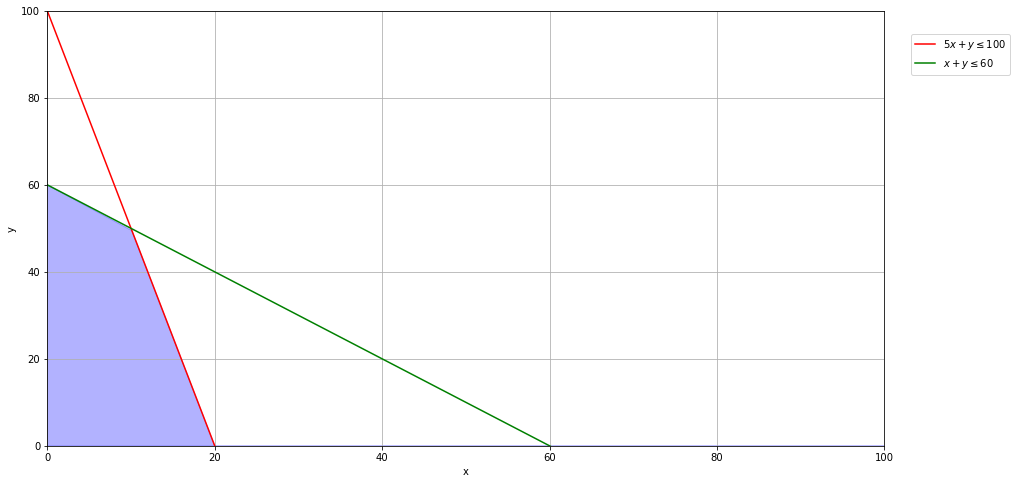

In [ ]:
plt.figure(figsize=(15, 8))

plt.plot(x_i, y_1, color = 'red', label=r'$5x +y\leq100$')
plt.plot(x_i, y_2, color = 'green', label=r'$x+y\leq60$')

plt.xlim((0, 100))
plt.ylim((0, 100))
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

plt.legend(bbox_to_anchor=(1.15, .9), loc=5, borderaxespad=0)
plt.fill_between(x_i, y_3, color = 'blue', alpha = 0.30)

plt.show()

### Pick corner point of feasible area

In [ ]:
corner_points = [(20, 0), (10, 50), (0, 60)]

for x, y in corner_points:
    print(f'At:{x, y}, max(z)= {250*x + 75*y}')

At:(20, 0), max(z)= 5000
At:(10, 50), max(z)= 6250
At:(0, 60), max(z)= 4500


### Using SciPy

#### Most important:

In SciPy [linprog](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#linear-programming-example) only accepts a minimization problem if you're solving a maximizing problem then you've to re-write your equation so that maximize become minimize and greater than equal constraints become less than equal to constraint. It can done by multiplying the entire equation by -1.

### The objective function needs to be re-written in terms of the <= constraint

**-z = -250x - 75y**

5x + y <= 100

x + y <= 60

x >= 0

y >= 0

In [ ]:
# -z = -250x - 75y
objective = [-250, -75]

lhs_inequality = [[5, 1],
                  [1, 1]]

rhs_inequality = [100,
                  60]

bounds = [(0, float('inf')),
          (0, float('inf'))]

In [ ]:
optimal_solution = linprog(c = objective, 
                           A_ub = lhs_inequality, 
                           b_ub = rhs_inequality,
                           bounds = bounds,
                           method = 'revised simplex')

optimal_solution

     con: array([], dtype=float64)
     fun: -6250.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([10., 50.])

Note:- You will get optimal value as a negative value that means, you get -z = -6250 or z = 6250 

In [ ]:
optimal_solution.fun

-6250.0

### Problem statement

The Happy Pet Food Company manufactures two types of dog food: Meaties and Yummies. Each batch of Meaties contains 20 pounds of cereal and 20 pounds of meat; each batch of Yummies contains 30 pounds of cereal and 10 pounds of meat. The rest is filler that we assume can be procured at infinite quantity for no cost.

Happy’s production is limited in several ways. Happy can buy only up to 400,000 pounds of cereal each month. It can buy only up to 200,000 pounds of meat per month.

Happy can only make a maximum of 8000 batches of Meaties each month due to sales constraints.

Happy makes a profit of $$65 on Meaties and $45 on Yummies. How many batches of Meaties and Yummies should it produce to maximize profit?


### Objective (maximize)

z = 65x + 45y 

### Subject to contraints:

20x + 30y <= 400000

20x + 10y <= 200000

x <= 8000

x >= 0, y >= 0

### Graphical Solution

# z = 65x + 45y

# 20x + 30y <= 400000
y_1 = (400000 - 20 * x_i) / 30

# 20x + 10y <= 300000
y_2 = (200000 - 20 * x_i) / 10

y_3 = np.minimum(y_1, y_2)

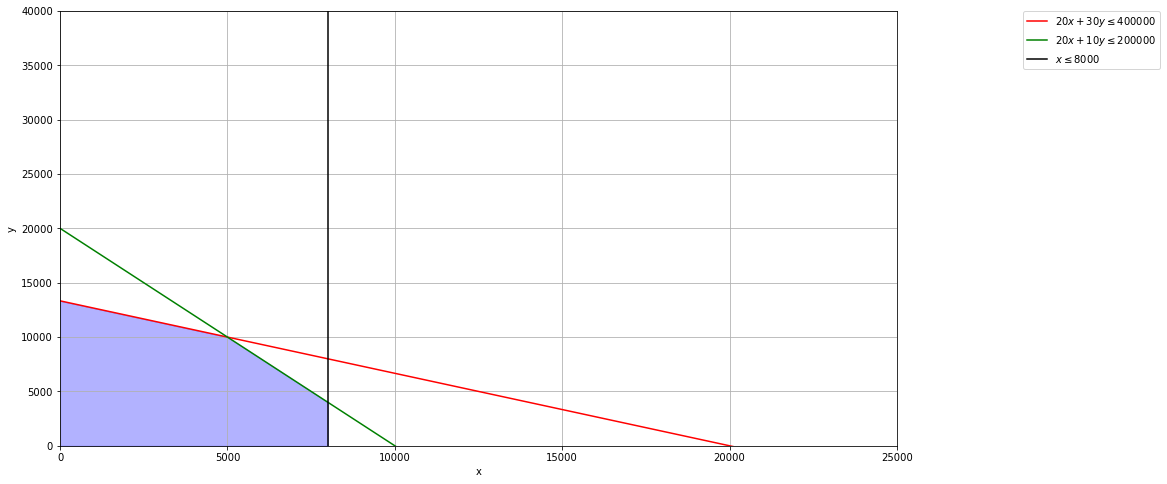

In [ ]:
plt.figure(figsize=(15, 8))

plt.plot(x_i, y_1, color = 'red', label=r'$20x + 30y\leq400000$')
plt.plot(x_i, y_2, color = 'green', label=r'$20x + 10y\leq200000$')
plt.axvline(x = 8000, color = 'black', label=r'$x\leq8000$')

plt.grid(True)
plt.xlim((0, 25000))
plt.ylim((0, 40000))
plt.xlabel('x')
plt.ylabel('y')

plt.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)
plt.fill_between(x_i[:8000], y_3[:8000], color = 'blue', alpha = 0.30)
plt.show()

### Pick corner point of feasible area

In [ ]:
opt_points = [(8000, 0), (8000, 4000), (5000, 10000), (0, 13333)]

for x,y in opt_points:
    print(f'At:{x, y}, Max(z)= {65*x + 45*y}')

At:(8000, 0), Max(z)= 520000
At:(8000, 4000), Max(z)= 700000
At:(5000, 10000), Max(z)= 775000
At:(0, 13333), Max(z)= 599985


In [ ]:
# -z = -65x - 45y
objective = [-65, -45]

lhs_inequality = [[20, 30],
                  [20, 10]]

rhs_inequality = [400000,
                  200000]

bounds = [(0, 8000.0),
          (0, float('inf'))]

In [ ]:
optimal_solution = linprog(c = objective, 
                           A_ub = lhs_inequality, 
                           b_ub = rhs_inequality,
                           bounds = bounds,
                           method = 'revised simplex')

optimal_solution

     con: array([], dtype=float64)
     fun: -775000.0
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([ 5000., 10000.])

## Using LpProblem function from PuLP library

This paper introduces the PuLP library, an open source package that allows mathematical programs to be described in the Python computer programming language. PuLP is a high-level modelling library that leverages the power of the Python language and allows the user to create programs using expressions that are natural to the Python language, avoiding special syntax and keywords wherever possible.

### Objective (maximize)

z = 65x + 45y 

### Subject to contraints:

20x + 30y <= 400000

20x + 10y <= 200000

x <= 8000

x >= 0, y >= 0

In [ ]:
!pip install pulp

     |████████████████████████████████| 40.6 MB 1.2 MB/s eta 0:00:01


In [ ]:
from pulp import LpMaximize, LpMinimize, LpProblem, LpStatus, lpSum, LpVariable

In [ ]:
model = LpProblem(name = 'happy-pet-food', sense = LpMaximize)

model

happy-pet-food:
MAXIMIZE
None
VARIABLES

### Set variable and bound

In [ ]:
x = LpVariable(name='x', lowBound=0, upBound=8000)
y = LpVariable(name='y', lowBound=0)

### Set Constraints

In [ ]:
model += (20*x + 30*y <= 400000, 'Cereal constraints')
model += (20*x + 10*y <= 200000, 'Meat constraints')

model

happy-pet-food:
MAXIMIZE
None
SUBJECT TO
Cereal_constraints: 20 x + 30 y <= 400000

Meat_constraints: 20 x + 10 y <= 200000

VARIABLES
x <= 8000 Continuous
y Continuous

### Set Objective function

In [ ]:
model += (65*x + 45*y)

model

happy-pet-food:
MAXIMIZE
65*x + 45*y + 0
SUBJECT TO
Cereal_constraints: 20 x + 30 y <= 400000

Meat_constraints: 20 x + 10 y <= 200000

VARIABLES
x <= 8000 Continuous
y Continuous

### Status of solution

https://www.coin-or.org/PuLP/constants.html#pulp.constants.LpStatus

- LpStatusOptimal	“Optimal”	1
- LpStatusNotSolved	“Not Solved”	0
- LpStatusInfeasible	“Infeasible”	-1
- LpStatusUnbounded	“Unbounded”	-2
- LpStatusUndefined	“Undefined”	-3

In [ ]:
status = model.solve()

status

1

### Optimal value

In [ ]:
model.objective.value()

775000.0

### Coordinates of optimal value

In [ ]:
for var in model.variables():
    print(f'{var.name} : {var.value()}')

x : 5000.0
y : 10000.0


## No feasible region no feasible solution (Infeasible)

https://en.wikipedia.org/wiki/Feasible_region#No_feasible_set

### Problem statement

Here is there is no real world example we will just set up an objective function. Just imagine the production of two widgets W1 and W2

**Maximize**

z = 3x + 2y 

**Constraints**

x + y >=8

3x + 5y <= 15

x >= 0

y >= 0

In [ ]:
x_i = np.linspace(0, 100, 10000)

In [ ]:
# z = 3x + 2y

# x + y >= 8
y_1 = 8 - x_i

# 3x + 5y <= 15
y_2 = (15 - 3 * x_i) / 5

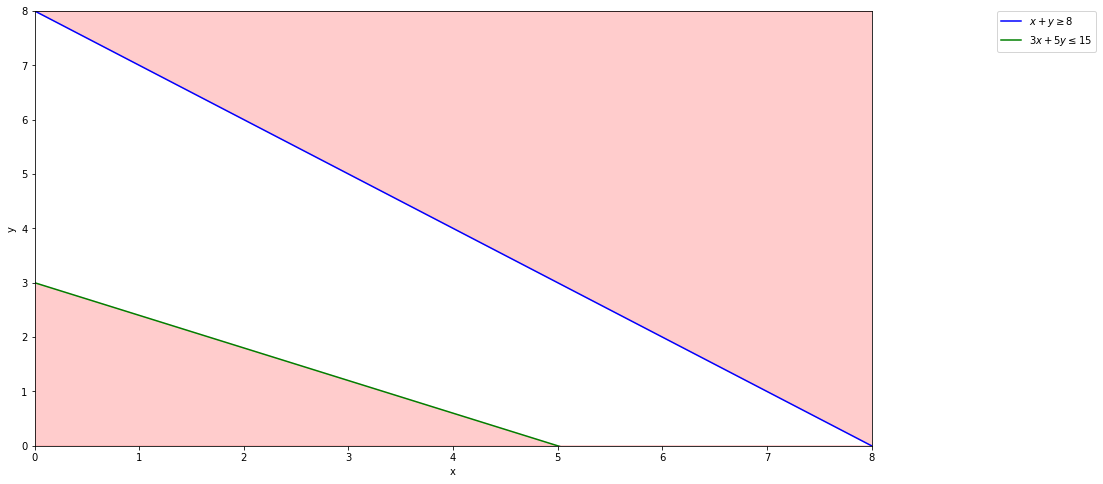

In [ ]:
plt.figure(figsize=(15, 8))

plt.plot(x_i, y_1, color = 'blue', label=r'$x +y\geq8$')
plt.plot(x_i, y_2, color = 'green', label=r'$3x+5y\leq15$', alpha = 1)

plt.xlim((0, 8))
plt.ylim((0, 8))
plt.xlabel('x')
plt.ylabel('y')

plt.fill_between(x_i, y_1, np.max(y_1), color = 'red', alpha = 0.20)
plt.fill_between(x_i, y_2, color = 'red', alpha = 0.20)

plt.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0)
plt.show()

### Set model and constraint variables
https://www.coin-or.org/PuLP/pulp.html

In [ ]:
model = LpProblem(name = 'infeasible-problem', sense = LpMaximize)

x = LpVariable(name = 'x', lowBound=0)
y = LpVariable(name = 'y', lowBound=0)

model

infeasible-problem:
MAXIMIZE
None
VARIABLES

### Add constraints to the model

In [ ]:
model += (x + y >= 8, "blue")
model+= (3*x + 5*y <= 15, "green")

model

infeasible-problem:
MAXIMIZE
None
SUBJECT TO
blue: x + y >= 8

green: 3 x + 5 y <= 15

VARIABLES
x Continuous
y Continuous

### Add objective to the model

In [ ]:
model += (3*x + 2*y)

model

infeasible-problem:
MAXIMIZE
3*x + 2*y + 0
SUBJECT TO
blue: x + y >= 8

green: 3 x + 5 y <= 15

VARIABLES
x Continuous
y Continuous

### Check status

In [ ]:
status = model.solve()

status

-1

### Problem statement


Here is there is no real world example we will just set up an objective function. Just imagine the production of two widgets W1 and W2. We want to minimize costs associated with producing the widgets

#### Note:- Feasible unbounded problem which has a solution

**Minimize**

Z = 50x + 70y

**Constraints**

2x + y >= 8

x + 2y >= 10

x >= 0

y >= 0

In [ ]:
x_i = np.linspace(0, 20, 1000)

In [ ]:
# 2x + y >= 8
y_1 = 8 - 2*x_i

# x + 2y >= 10
y_2 = (10 - x_i) / 2

y_3 = np.maximum(y_1, y_2)

### Graphical solution

Note:- Feasible area will be the upper portion of the two lines

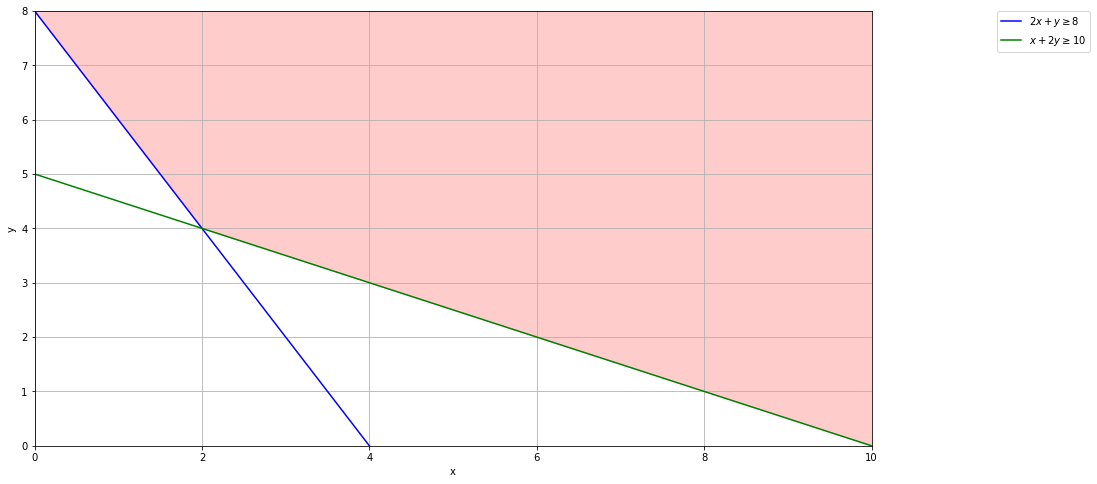

In [ ]:
plt.figure(figsize=(15, 8))

plt.plot(x_i, y_1, color = 'blue', label=r'$2x +y\geq8$')
plt.plot(x_i, y_2, color = 'green', label=r'$x+2y\geq10$', alpha = 1)

plt.grid(True)
plt.xlim((0, 10))
plt.ylim((0, 8))
plt.xlabel('x')
plt.ylabel('y')


plt.fill_between(x_i, y_3, np.max(y_3), color = 'red', alpha = .20)
plt.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)
plt.show()

### Pick corner point of feasible area

To get optimal solution, you've to pick corner points of feasible area and put into objective function and check which coordinates give us the optimal solution 

In [ ]:
corner_points = [(10, 0), (2, 4), (0, 8)]

for x, y in corner_points:
    print(f'At:{x, y}, min(z)= {50*x + 70*y}')

At:(10, 0), min(z)= 500
At:(2, 4), min(z)= 380
At:(0, 8), min(z)= 560


Let's draw the line through the minimum value found by our optimization

In [ ]:
# 380 = 50x + 70y

y_3 = (380 - 50 * x_i) / 70

you can see, there is no comman point in unbounded feasible except (2, 4) therefore only this point you'll get minimum value for objective function

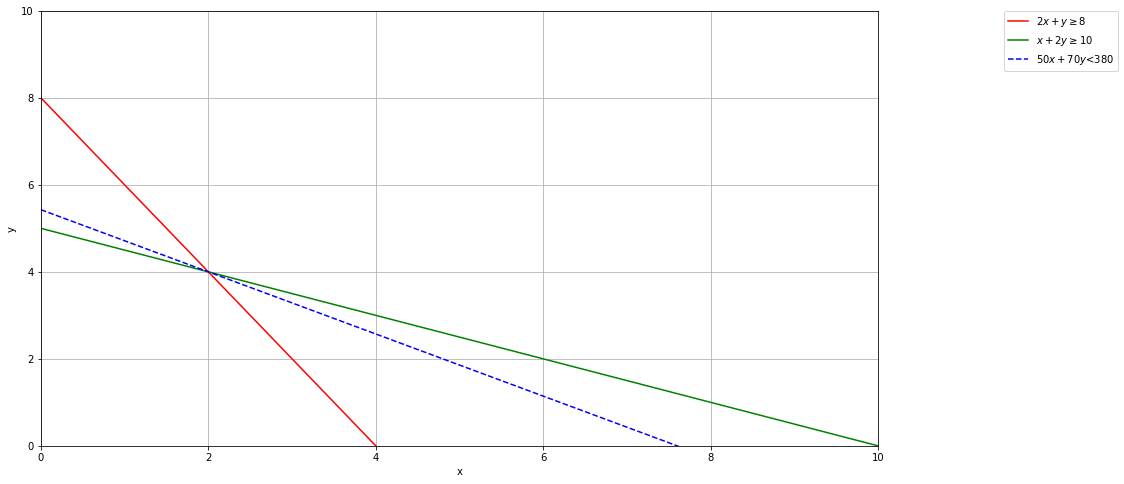

In [ ]:
plt.figure(figsize=(15, 8))

plt.plot(x_i, y_1, color = 'red',label=r'$2x +y\geq8$')
plt.plot(x_i, y_2, color = 'green', label=r'$x+2y\geq10$', alpha = 1)
plt.plot(x_i, y_3, '--', color = 'Blue', label=r'$50x+70y\less380$', alpha = 1)

plt.grid(True)
plt.xlim((0, 10))
plt.ylim((0, 10))
plt.xlabel('x')
plt.ylabel('y')

plt.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)
plt.show()

### Solution using PuLp

In [ ]:
model = LpProblem(name = 'feasible-unbounded-problem', sense = LpMinimize)

x = LpVariable(name = 'x', lowBound=0)
y = LpVariable(name = 'y', lowBound=0)

model

feasible-unbounded-problem:
MINIMIZE
None
VARIABLES

### Add constraints to the model

In [ ]:
model += (2*x + y >= 8, "red")
model += (x + 2*y >= 10, "green")

model

feasible-unbounded-problem:
MINIMIZE
None
SUBJECT TO
red: 2 x + y >= 8

green: x + 2 y >= 10

VARIABLES
x Continuous
y Continuous

### Add objective to the model

In [ ]:
model += 50*x + 70*y

model

feasible-unbounded-problem:
MINIMIZE
50*x + 70*y + 0
SUBJECT TO
red: 2 x + y >= 8

green: x + 2 y >= 10

VARIABLES
x Continuous
y Continuous

### Check status

In [ ]:
status = model.solve()
status

1

In [ ]:
model.objective.value()

380.0